In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')


In [2]:
#Download latest version
df = pd.read_csv(f"../artifact/NY-House-Dataset.csv")
df.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [63]:
df.info()
# target variable is price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

## EDA

In [ ]:
df.head(5)
# remove columns [BrokerTitle, Address, State, Main_address, 
# Adnubustrative_area_level_2, Street_name, Logname, Formatted_address, latitute, longitude]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


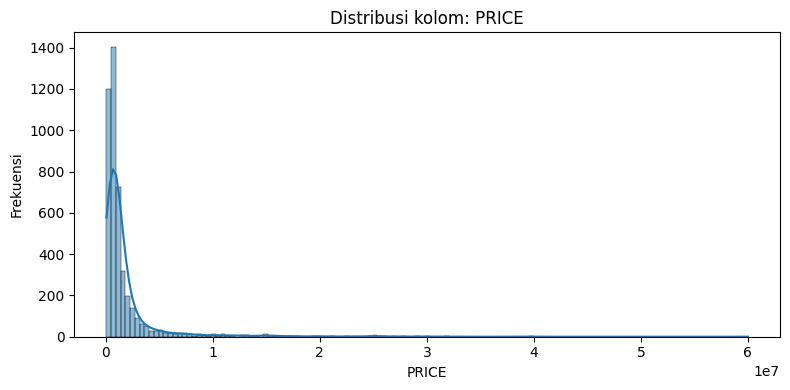

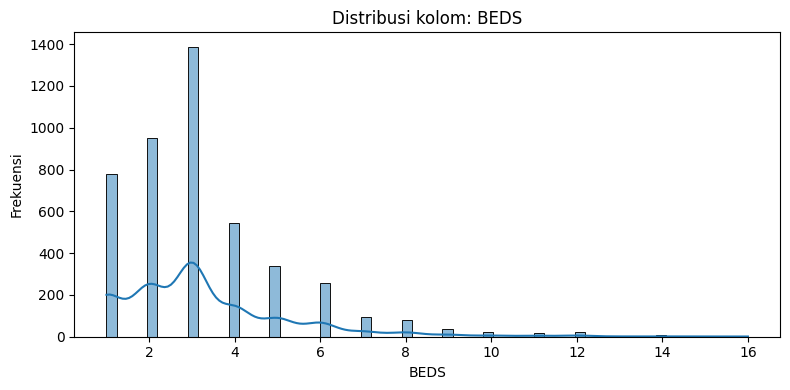

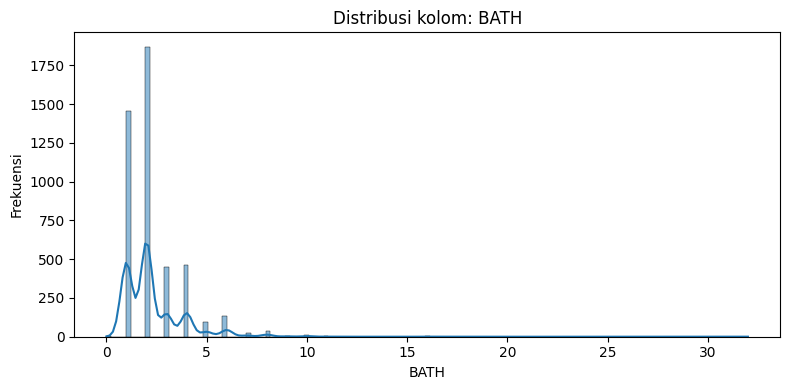

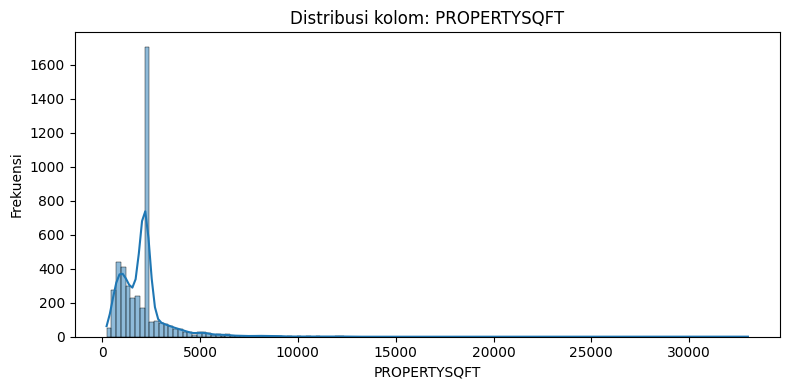

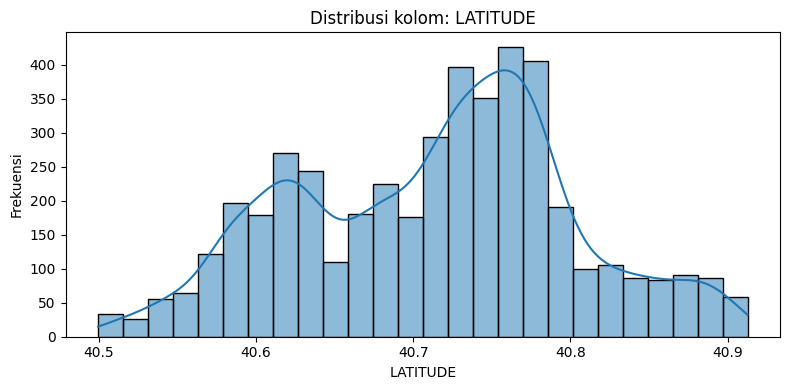

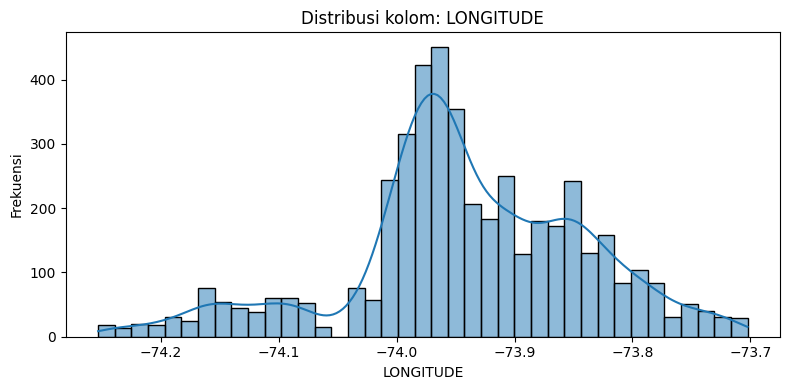

In [37]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()


In [ ]:
df['PRICE'].sort_values(ascending=True).head(10)
# 304, 1, 317, 310, 360 463 outliers

317      2494
310      3225
360      5800
463     49500
979     60000
188     65000
3       69000
252     69000
132     69900
4003    75000
Name: PRICE, dtype: int64

In [ ]:
df['BEDS'].sort_values(ascending=False).head(10)
# remove outlier beds [1143, 2653, 3276,2488,765,2265,3589,3603,4240,2564,1092,1410,1214,750,4191,4404]

1143    50
2653    42
3276    40
2488    36
765     35
2265    32
3589    32
3603    30
1092    24
4240    24
Name: BEDS, dtype: int64

In [ ]:
df['PROPERTYSQFT'].sort_values(ascending=False)
#drop values outlier [4623,2146,2148,823,3130,141,2932,2054,917,1823,4353,2107,69,4,2171]

4623    65535.0
2146    55300.0
2148    55300.0
823     48000.0
7       33000.0
         ...   
1494      260.0
332       250.0
2166      250.0
4693      246.0
188       230.0
Name: PROPERTYSQFT, Length: 4801, dtype: float64

In [ ]:
df['LOCALITY'].unique()

array(['New York', 'New York County', 'The Bronx', 'Kings County',
       'Bronx County', 'Queens County', 'Richmond County',
       'United States', 'Brooklyn', 'Queens', 'Flatbush'], dtype=object)

## Feature Engineering

In [64]:
# drop value 
df.drop([304, 1, 317, 310, 360, 463], inplace=True)  # PRICE outliers
df.drop([1143, 2653, 3276,2488,765,2265,3589,3603,4240,2564,1092,1410,1214,750,4191,4404], inplace=True)  # BEDS outliers
df.drop([4623,2146,2148,823,3130,141,2932,2054,917,1823,4353,2107,69,4,2171], inplace=True)  # PROPERTYSQFT outliers

In [65]:
# drop columns 
df.drop(['TYPE','STATE','ADDRESS','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS','LONGITUDE', 'LATITUDE','BROKERTITLE','SUBLOCALITY'], axis=1, inplace=True)
df.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY
0,315000,2,2.0,1400.000000,New York
2,260000,4,2.0,2015.000000,New York
3,69000,3,1.0,445.000000,New York
5,690000,5,2.0,4004.000000,New York
6,899500,2,2.0,2184.207862,New York County


In [66]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [67]:
df.isna().sum()

PRICE           0
BEDS            0
BATH            0
PROPERTYSQFT    0
LOCALITY        0
dtype: int64

In [68]:
df['BATH'] = df['BATH'].astype(int)
df['PROPERTYSQFT'] = df['PROPERTYSQFT'].astype(int)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4328 entries, 0 to 4800
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PRICE         4328 non-null   int64 
 1   BEDS          4328 non-null   int64 
 2   BATH          4328 non-null   int64 
 3   PROPERTYSQFT  4328 non-null   int64 
 4   LOCALITY      4328 non-null   object
dtypes: int64(4), object(1)
memory usage: 202.9+ KB


In [70]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT
count,4.328000e+03,4328.000000,4328.000000,4328.000000
mean,1.847010e+06,3.318392,2.327634,2053.992144
std,3.816164e+06,2.087150,1.590605,1409.757711
min,6.000000e+04,1.000000,0.000000,230.000000
25%,4.999000e+05,2.000000,1.000000,1161.500000
50%,8.390000e+05,3.000000,2.000000,2184.000000
75%,1.499000e+06,4.000000,3.000000,2184.000000
max,6.000000e+07,16.000000,32.000000,33000.000000


In [71]:
# calculate varians
import statistics 
varians_price = statistics.variance(df['PRICE'])
print(f"variansi data :\n {varians_price}")

variansi data :
 14563107218363.967


In [72]:
# mengubah skewness dan mengungi variansi padapada value price sehingga 
df['PRICE'] = np.log(df['PRICE'])

variansi data :
 1.0067869631720225


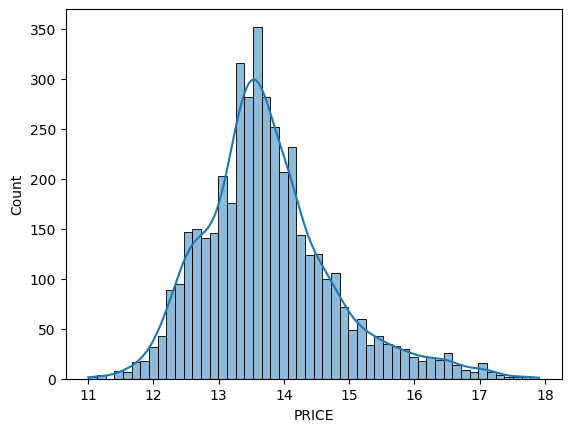

In [73]:
sns.histplot(df['PRICE'],kde=True)
varians_price_after_log = statistics.variance(df['PRICE'])
print(f"variansi data :\n {varians_price_after_log}")

KeyError: 'LATITUDE'

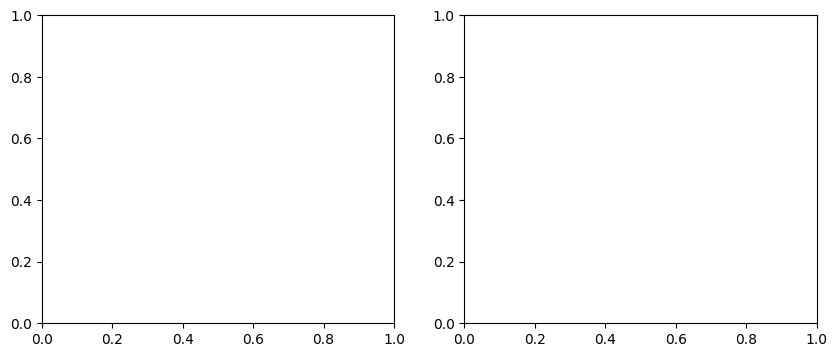

In [74]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.histplot(data=df['LATITUDE'],kde=True,ax=axes[0])
axes[0].set_title('LATITUDE')

sns.histplot(data=df['LONGITUDE'],kde=True,ax=axes[1])
axes[1].set_title('LONGITUDE')

plt.tight_layout()
plt.show()


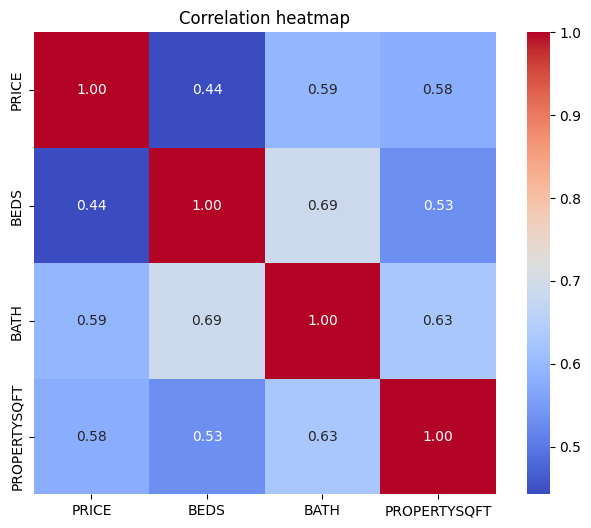

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm',fmt='.2f',square=True)
plt.title('Correlation heatmap')
plt.show()


## Dataset Preparation

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [9]:
X = df.drop('PRICE',axis=1)
y = df['PRICE']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64','float64']).columns.tolist()


In [11]:
X_train

,BROKERTITLE,TYPE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
2851,Brokered by Signature Premier Properties,Co-op for sale,1,1.0,2184.207862,245-18 62nd Ave Unit Upper,"Little Neck, NY 11362","245-18 62nd Ave Unit UpperLittle Neck, NY 11362",United States,New York,Queens County,Queens,62nd Avenue,"245-18 62nd Ave, Douglaston, NY 11362, USA",40.755562,-73.731668
3262,Brokered by Brown Harris Stevens,Co-op for sale,1,1.0,2184.207862,5601 Riverdale Ave Apt 3S,"Bronx, NY 10471","5601 Riverdale Ave Apt 3SBronx, NY 10471",New York,Bronx County,The Bronx,North Riverdale,5601,"5601 Riverdale Ave #3s, Bronx, NY 10471, USA",40.904882,-73.905111
4577,Brokered by Papa Realty,Co-op for sale,2,2.0,2184.207862,17-85 215 St Unit 6H,"Bayside, NY 11360","17-85 215 St Unit 6HBayside, NY 11360",New York,Queens County,Queens,Flushing,17-85,"17-85 215th St #6k, Flushing, NY 11360, USA",40.784301,-73.776196
1774,Brokered by EXP Realty,Pending,3,1.0,1504.000000,80-07 Margaret Pl,"Glendale, NY 11385","80-07 Margaret PlGlendale, NY 11385",United States,New York,Queens County,Queens,Margaret Place,"80-07 Margaret Pl, Flushing, NY 11385, USA",40.705861,-73.856597
1957,Brokered by Trademarko Realty Inc,House for sale,5,3.0,2637.000000,53-30 61st St,"Maspeth, NY 11378","53-30 61st StMaspeth, NY 11378",United States,New York,Queens County,Queens,61st Street,"53-30 61st St, Maspeth, NY 11378, USA",40.729123,-73.904268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,Brokered by Brown Harris Stevens - 445 Park Av...,Co-op for sale,3,3.0,2184.207862,8 E 83rd St Units 11 & 12D,"Manhattan, NY 10028","8 E 83rd St Units 11 & 12DManhattan, NY 10028",New York,New York County,New York,Manhattan,8,"8 East 83rd St Tenants Corporation, 8 E 83rd S...",40.779101,-73.961095
466,Brokered by COMPASS,House for sale,3,2.0,1590.000000,70-17 Nansen St,"Queens, NY 11375","70-17 Nansen StQueens, NY 11375",United States,New York,Queens County,Queens,Nansen Street,"70-17 Nansen St, Flushing, NY 11375, USA",40.712096,-73.851808
3092,Brokered by City Realty Group,Co-op for sale,2,1.0,2184.207862,99-72 66 Rd Unit 7C,"Rego Park, NY 11374","99-72 66 Rd Unit 7CRego Park, NY 11374",New York,Queens County,Queens,Rego Park,99-72,"99-72 66th Rd #7c, Rego Park, NY 11374, USA",40.728235,-73.852209
3772,Brokered by Keller Williams Realty NYC Grp,House for sale,3,1.0,1696.000000,1217 Fairfax Ave,"Bronx, NY 10465","1217 Fairfax AveBronx, NY 10465",United States,New York,Bronx County,The Bronx,Fairfax Avenue,"1217 Fairfax Ave, Bronx, NY 10465, USA",40.837740,-73.824147


In [7]:
one_hot = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
one_hot.fit(X_train[categorical_columns])

X_train_cat = one_hot.transform(X_train[categorical_columns])
X_test_cat = one_hot.transform(X_test[categorical_columns])

encoded_categorical_columns = one_hot.get_feature_names_out(categorical_columns)

X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoded_categorical_columns, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=encoded_categorical_columns, index=X_test.index)

X_train_num_df = X_train[numerical_columns].reset_index(drop=True)
X_test_num_df = X_test[numerical_columns].reset_index(drop=True)

X_train_final = pd.concat([X_train_num_df, X_train_cat_df.reset_index(drop=True)],axis=1)
X_test_final = pd.concat([X_test_num_df, X_test_cat_df.reset_index(drop=True)],axis=1)
X_train_final.head()

,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,BROKERTITLE_Brokered by 5 Boro Realty Corp,BROKERTITLE_Brokered by A J Realty Of Queens Inc,BROKERTITLE_Brokered by A P Services Inc,BROKERTITLE_Brokered by AAA Young Shuen Realty Inc,"BROKERTITLE_Brokered by ABC REAL ESTATE SERVICES, INC.",...,"FORMATTED_ADDRESS_Random House Tower, 230 W 56th St APT 65B, New York, NY 10019, USA","FORMATTED_ADDRESS_Regis Residence, 2 E 55th St #1118, New York, NY 10022, USA","FORMATTED_ADDRESS_Regis Residence, 2 E 55th St #803, New York, NY 10022, USA","FORMATTED_ADDRESS_Suffolk St, New York, NY 10002, USA","FORMATTED_ADDRESS_The Belvedere, 84-12 35th Ave #4c, Jackson Heights, NY 11372, USA","FORMATTED_ADDRESS_The Briarcliff, 3515 Henry Hudson Pkwy #3d, Bronx, NY 10463, USA","FORMATTED_ADDRESS_The Police Building, 240 Centre St #2b, New York, NY 10013, USA","FORMATTED_ADDRESS_Tudor City, New York, NY 10017, USA","FORMATTED_ADDRESS_Waldron Ave, Staten Island, NY 10301, USA","FORMATTED_ADDRESS_roosevelt house, 102-40 67th Dr #1b, Flushing, NY 11375, USA"
0,1,1.0,2184.207862,40.755562,-73.731668,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,2184.207862,40.904882,-73.905111,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2.0,2184.207862,40.784301,-73.776196,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,1504.000000,40.705861,-73.856597,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3.0,2637.000000,40.729123,-73.904268,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
y_train
# colom yang tidak penting harus dibuang seperti ZIP

4516    12.611538
4398    15.123843
4288    13.493927
4757    12.524526
3015    14.488455
          ...    
3766    14.096923
492     13.737333
3352    13.458836
4152    14.038654
909     12.751300
Name: PRICE, Length: 3462, dtype: float64

<Axes: >

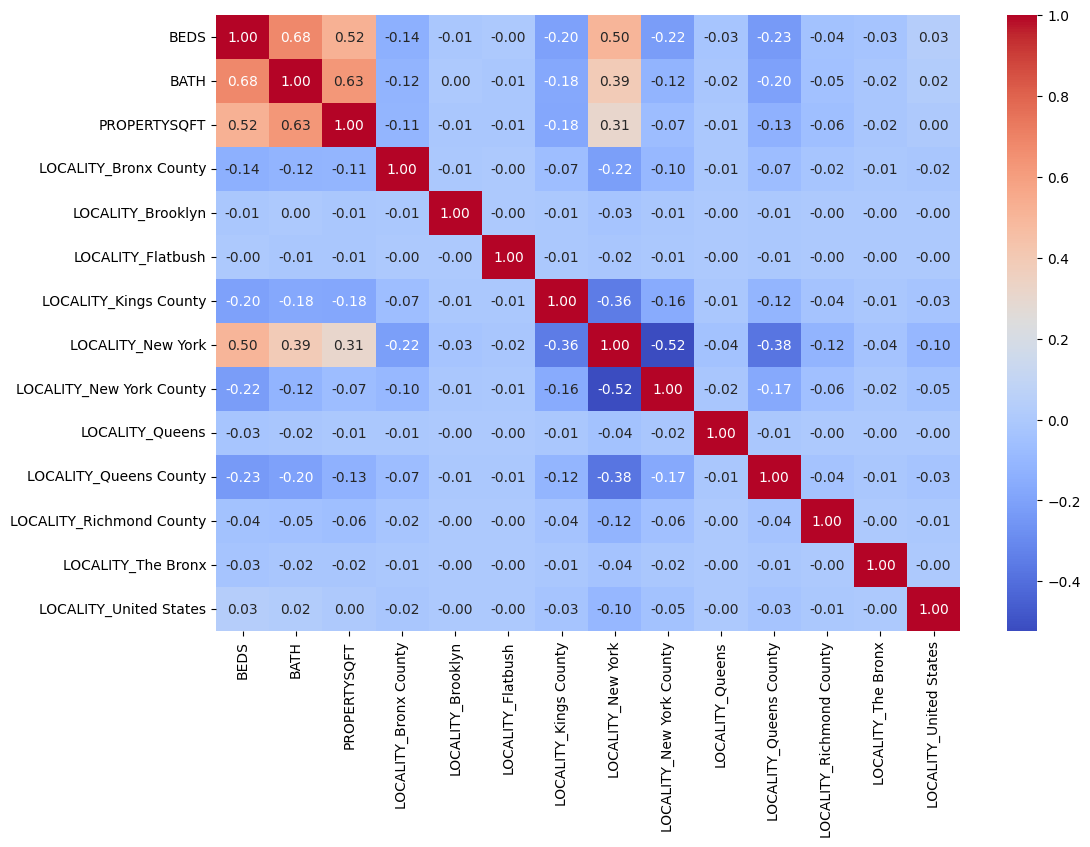

In [83]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_final.corr(), annot=True, fmt=".2f", cmap='coolwarm')

## Model Building and Training

In [85]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow
import pickle

In [86]:
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('predict_house_price_new_york')
def evaluate_model(y_true,y_pred,):
    return {
        'MAE' : mean_absolute_error(y_true, y_pred),
        'RMSE' : mean_squared_error(y_true,y_pred),
        'R2_Score' : r2_score(y_true,y_pred)
    }
    
    

2025/10/29 11:27:30 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/10/29 11:27:30 INFO mlflow.store.db.utils: Updating database tables
2025-10-29 11:27:30 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-10-29 11:27:30 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2025-10-29 11:27:30 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-10-29 11:27:30 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.


In [87]:
models = {
    'XGB_Regressor': {
        'model' : XGBRegressor(),
        'params' : {
            'n_estinamtors' : 300,
            'max_depth'  : 6,
            'learning_rate' : 0.1, 
            'random_state' : 42
        }
    },
    'Random_Forest_Regressor': {
        'model' : RandomForestRegressor(),
        'params' : {
            'n_estimators' : 200,
            'max_depth' : 10,
            'random_state' : 42
        }
    },    
    'Gradient_Boosting_Regressor': {
        'model' : GradientBoostingRegressor(),
        'params' : {
            'n_estimators' : 200,
            'learning_rate' : 0.1,
            'max_depth' : 6,
            'random_state' : 42
        }
    },
    'Decision_Tree_Regressor': {
        'model' : DecisionTreeRegressor(),
        'params' : {
            'max_depth' : 10,
            'random_state' : 42
        }
    },
}

# ridge= Ridge()
# estimator = [
#     ('xgb',XGBRegressor(**models['XGB_Regressor']['params']))
#     ('rf',RandomForestRegressor(**models['Random_Forest_Regressor']['params']))
#     ('gb',XGBRegressor(**models['Gradient_Boosting_Regressor']['params']))
#     ('dt',XGBRegressor(**models['Decision_Tree_Regressor']['params']))
# ]
# stacking_regressor = StackingRegressor(
#     estimators=estimator,
#     final_estimator=ridge
# )

In [88]:
for model_name, model_info in models.items():
    with mlflow.start_run(run_name=model_name):
        # log model parameters
        mlflow.log_params(model_info['params'])
        
        # train model
        model = model_info['model'].set_params(**model_info['params'])
        model.fit(X_train_final, y_train)
        
        #make predictions
        y_pred= model.predict(X_test_final)
        
        # save model local
        with open(f'{model_name}_model.pkl', 'wb') as f:
            pickle.dump(model, f)
        
        #calculate metrics
        metrics = evaluate_model(y_test,y_pred)
        mlflow.log_metrics(metrics)
        
        # log model
        mlflow.sklearn.log_model(model,model_name,registered_model_name=f"{model_name}_model")
        
        print(f"\nModel: {model_name}")
        for metric_name, metric_value, in metrics.items():
            print(f"{metric_name}: {metric_value:.4f}")    
        

2025/10/29 11:27:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/29 11:27:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/29 11:27:53 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/10/29 11:27:53 INFO mlflow.store.db.utils: Updating database tables
2025-10-29 11:27:53 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-10-29 11:27:53 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
Registered model 'XGB_Regressor_model' already exists. Creating a new version of this model...
Created version '4' of model 'XGB_Regressor_model'.



Model: XGB_Regressor
MAE: 0.3912
RMSE: 0.2773
R2_Score: 0.7401


2025/10/29 11:27:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/29 11:27:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random_Forest_Regressor_model' already exists. Creating a new version of this model...
Created version '4' of model 'Random_Forest_Regressor_model'.



Model: Random_Forest_Regressor
MAE: 0.3944
RMSE: 0.2825
R2_Score: 0.7352


2025/10/29 11:28:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/29 11:28:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Gradient_Boosting_Regressor_model' already exists. Creating a new version of this model...
Created version '4' of model 'Gradient_Boosting_Regressor_model'.



Model: Gradient_Boosting_Regressor
MAE: 0.3938
RMSE: 0.2815
R2_Score: 0.7361


2025/10/29 11:28:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/29 11:28:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Decision_Tree_Regressor_model' already exists. Creating a new version of this model...
Created version '4' of model 'Decision_Tree_Regressor_model'.



Model: Decision_Tree_Regressor
MAE: 0.4236
RMSE: 0.3369
R2_Score: 0.6843


## With Hyperamater Tuning

In [89]:
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('predict_house_price_new_york_v2')

<Experiment: artifact_location='file:///d:/Python/dibimbing/assigment_day_41/research/mlruns/2', creation_time=1761626179572, experiment_id='2', last_update_time=1761626179572, lifecycle_stage='active', name='predict_house_price_new_york_v2', tags={}>

In [90]:
models_hyperTuning = {
    'XGB_Regressor': {
        'model' : XGBRegressor(random_state=42),
        'params' : {
            'n_estinamtor' : [200,300,400],
            'max_dept'  : [4,6,8],
            'learning_rate' : [0.05 ,0.1], 
        }
    },
    'Random_Forest_Regressor': {
        'model' : RandomForestRegressor(random_state=42),
        'params' : {
            'n_estimators' : [100,200,300],
            'max_depth' : [8,10,12],
        }
    },    
    'Gradient_Boosting_Regressor': {
        'model' : GradientBoostingRegressor(random_state=42),
        'params' : {
            'n_estimators' : [100,200,300],
            'learning_rate' : [0.05,0.1],
            'max_depth' : [4,6,8],
        }
    },
    'Decision_Tree_Regressor': {
        'model' : DecisionTreeRegressor(random_state=42),
        'params' : {
            'max_depth' : [8,10,12,15],
        }
    }
}

In [91]:
# grid search hyperparameter tuning
for model_name, model_info in models_hyperTuning.items():
    with mlflow.start_run(run_name=f"{model_name}_Hyperparameter_Tuning") :
        
        
        grid_search= model_info['model'] 
        grid_search = GridSearchCV(estimator=model_info['model'],
                                param_grid=model_info['params'],
                                scoring='neg_mean_squared_error',
                                cv=5,
                                n_jobs=-1,
                                verbose=1)
        grid_search.fit(X_train_final, y_train)
        
        best_model = grid_search.best_estimator_
        
        mlflow.log_params(best_model.get_params())
        
        y_pred = best_model.predict(X_test_final)
        
        #save model pkl
        with open(f'{model_name}_best_model.pkl', 'wb') as f:
            pickle.dump(best_model, f)
        
        
        metrics = evaluate_model(y_test,y_pred)
        mlflow.log_metrics(metrics)
        #save log model
        mlflow.sklearn.log_model(best_model,model_name,registered_model_name=f"{model_name}_best_model")
        
        print(f"\nModel: {model_name} after Hyperparameter Tuning")
        for metric_name, metric_value, in metrics.items():
            print(f"{metric_name}: {metric_value:.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits


2025/10/29 11:31:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/29 11:31:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'XGB_Regressor_best_model' already exists. Creating a new version of this model...
Created version '6' of model 'XGB_Regressor_best_model'.



Model: XGB_Regressor after Hyperparameter Tuning
MAE: 0.3929
RMSE: 0.2775
R2_Score: 0.7399
Fitting 5 folds for each of 9 candidates, totalling 45 fits


2025/10/29 11:31:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/29 11:31:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random_Forest_Regressor_best_model' already exists. Creating a new version of this model...
Created version '6' of model 'Random_Forest_Regressor_best_model'.



Model: Random_Forest_Regressor after Hyperparameter Tuning
MAE: 0.3954
RMSE: 0.2827
R2_Score: 0.7351
Fitting 5 folds for each of 18 candidates, totalling 90 fits


2025/10/29 11:31:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/29 11:31:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Gradient_Boosting_Regressor_best_model' already exists. Creating a new version of this model...
Created version '6' of model 'Gradient_Boosting_Regressor_best_model'.



Model: Gradient_Boosting_Regressor after Hyperparameter Tuning
MAE: 0.3992
RMSE: 0.2855
R2_Score: 0.7324
Fitting 5 folds for each of 4 candidates, totalling 20 fits


2025/10/29 11:31:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/29 11:31:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Decision_Tree_Regressor_best_model' already exists. Creating a new version of this model...
Created version '6' of model 'Decision_Tree_Regressor_best_model'.



Model: Decision_Tree_Regressor after Hyperparameter Tuning
MAE: 0.4110
RMSE: 0.3112
R2_Score: 0.7083


In [92]:
from mlflow.tracking import MlflowClient

def load_production_model(model_name):
    model = mlflow.sklearn.load_model(f"models:/{model_name}/Production")
    return model

client = MlflowClient()

def trasition_model_to_production(model_name):
    client =  MlflowClient()
    latest_version = client.get_latest_versions(f"{model_name}_best_model",stages=['None'])[0]
    client.transition_model_version_stage(
        name=f"{model_name}_best_model",
        version = latest_version.version,
        stage = 'Production'
    )

In [93]:
trasition_model_to_production('Decision_Tree_Regressor')

In [94]:
def get_all_runs():
    experiment = mlflow.get_experiment_by_name('predict_house_price_new_york')
    runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
    return runs

In [95]:
runs_df = get_all_runs()
metrics_comparison = runs_df[['tags.mlflow.runName','metrics.MAE','metrics.RMSE','metrics.R2_Score']]
print("\nModel Performance Comparison:")
print(metrics_comparison) 


Model Performance Comparison:
           tags.mlflow.runName   metrics.MAE  metrics.RMSE  metrics.R2_Score
0      Decision_Tree_Regressor      0.423584  3.368902e-01          0.684272
1  Gradient_Boosting_Regressor      0.393800  2.815444e-01          0.736141
2      Random_Forest_Regressor      0.394415  2.825188e-01          0.735228
3                XGB_Regressor      0.391224  2.773324e-01          0.740088
4      Decision_Tree_Regressor  11379.442948  1.669317e+09          0.996996
5  Gradient_Boosting_Regressor   7408.812842  4.977435e+08          0.999104
6      Random_Forest_Regressor   9183.770681  1.380346e+09          0.997516
7                XGB_Regressor  13080.513672  8.928392e+08          0.998393


In [96]:
best_model = load_production_model('Decision_Tree_Regressor_best_model')
y_pred = best_model.predict(X_test_final)
evaluation_results = evaluate_model(y_test,y_pred)
df_results = pd.DataFrame([evaluation_results])
df_results

,MAE,RMSE,R2_Score
0,0.410955,0.311216,0.708333
